<a href="https://colab.research.google.com/github/shudhanshumishra/DeepLearning/blob/main/Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(400, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop('Serial No.', axis=1, inplace=True)

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization ,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import huber

In [68]:
# Try these modifications
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dense(1)  # No activation
])

# Lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='mae',  # More robust than MSE
    metrics=['mse']
)

# Train longer with early stopping
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[EarlyStopping(patience=20)],
    verbose=1
)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.5925 - mse: 0.3818 - val_loss: 0.5785 - val_mse: 0.3678
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5323 - mse: 0.3111 - val_loss: 0.5072 - val_mse: 0.2923
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4777 - mse: 0.2554 - val_loss: 0.4347 - val_mse: 0.2262
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4052 - mse: 0.1954 - val_loss: 0.3671 - val_mse: 0.1716
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3193 - mse: 0.1314 - val_loss: 0.3093 - val_mse: 0.1292
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2748 - mse: 0.1002 - val_loss: 0.2576 - val_mse: 0.0979
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2290 - mse: 0.0729 - val_loss: 0.2284 - val_mse: 0.0805
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2166 - mse: 0.0667 - val_loss: 0.2158 - val_mse: 0.0711
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1

In [70]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,877 (30.77 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,252 (20.52 KB)

In [71]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7797287399942298

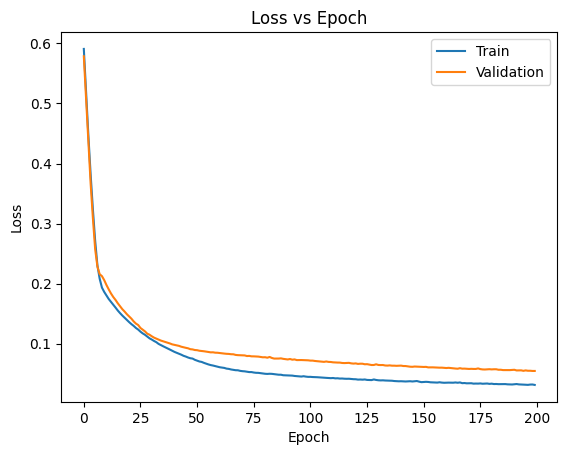

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend(['Train', 'Validation'])
plt.show()